┌ Info: Saved animation to c:\Users\Golum\Desktop\iu9-education\optimization-methods\let5\genetic_algorithm.gif
└ @ Plots C:\Users\Golum\.julia\packages\Plots\kLeqV\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\Golum\\Desktop\\iu9-education\\optimization-methods\\let5\\genetic_algorithm.gif")
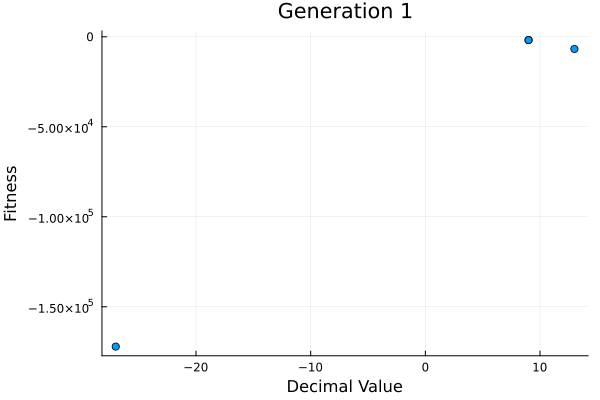

In [ ]:
using Random, Plots

# Параметры алгоритма
population_size = 4
chromosome_length = 5
generations = 50
mutation_rate = 0.1
crossover_rate = 0.7

# Функция преобразования бинарного вектора в десятичное число
function binary_to_decimal(binary_vector)
    decimal_number = 0
    for (i, bit) in enumerate(reverse(binary_vector))
        decimal_number += bit * 2^(i - 1)
    end
    if binary_vector[1] == 1
        decimal_number = -decimal_number
    end
    return decimal_number
end

# Функция приспособленности
function fitness(x)
    num = binary_to_decimal(x)
    return - (5 - 24 * num + 17 * num^2 - 4/3 * num^3 + 1/4 * num^4)
end

# Генерация случайного индивидуума
function generate_individual(length)
    return rand(Bool, length)
end

# Генерация начальной популяции
function generate_population(size, length)
    return [generate_individual(length) for _ in 1:size]
end

# Турнирный отбор
function tournament_selection(population, fitness_values, k=3)
    selected = rand(1:length(population), k)  # случайный выбор индивидов
    best = selected[1]
    best_fitness = fitness_values[best]
    for i in selected
        if fitness_values[i] > best_fitness
            best = i
            best_fitness = fitness_values[i]
        end
    end
    return best
end

# Кроссовер
function crossover(parent1, parent2)
    if rand() > crossover_rate
        return parent1, parent2
    end
    crossover_point = rand(1:length(parent1))
    child1 = vcat(parent1[1:crossover_point], parent2[crossover_point+1:end])
    child2 = vcat(parent2[1:crossover_point], parent1[crossover_point+1:end])
    return child1, child2
end

# Мутация
function mutate(chromosome)
    if rand() < mutation_rate
        mutation_point = rand(1:length(chromosome))
        chromosome[mutation_point] = !chromosome[mutation_point]
    end
    return chromosome
end

# Основная функция генетического алгоритма
function genetic_algorithm()
    population = generate_population(population_size, chromosome_length)
    anim = Animation()

    for generation in 1:generations
        fitness_values = [fitness(ind) for ind in population]
        decimal_chromosomes = [binary_to_decimal(ind) for ind in population]
        scatter(decimal_chromosomes, fitness_values, xlabel="Decimal Value", ylabel="Fitness", title="Generation $generation", legend=false)
        frame(anim)
        
        new_population = []
        for _ in 1:(population_size ÷ 2)
            parent1 = population[tournament_selection(population, fitness_values)]
            parent2 = population[tournament_selection(population, fitness_values)]
            child1, child2 = crossover(parent1, parent2)
            push!(new_population, mutate(child1))
            push!(new_population, mutate(child2))
        end
        population = new_population
    end
    gif(anim, "genetic_algorithm.gif", fps=5)
end

genetic_algorithm()
